In [1]:
import cv2

import dlib

import numpy 

import matplotlib.pyplot as plt

In [2]:
PREDICTOR_PATH = "shape_predictor_68_face_landmarks.dat"

predictor = dlib.shape_predictor(PREDICTOR_PATH)

detector = dlib.get_frontal_face_detector()

In [3]:
class TooManyFaces(Exception) :
    
    pass

class NoFaces(Exception) :
    
    pass

In [4]:
def get_landmarks(im) :
    
    rects = detector(im, 1)

    if len(rects) > 1 :
        
        raise TooManyFaces
        
    if len(rects) == 0 :
        
        raise NoFaces

    return numpy.matrix([[p.x, p.y] for p in predictor(im, rects[0]).parts()])

In [5]:
def annotate_landmarks(im, landmarks) :
    
    im = im.copy()
    
    for idx, point in enumerate(landmarks) :
        
        pos = (point[0, 0], point[0, 1])
        
        cv2.putText(im, str(idx), pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    color=(0, 0, 255))
        
        cv2.circle(im, pos, 3, color=(0, 255, 255))
        
    return im

In [6]:
image = cv2.imread('./Section7Images/Obama.jpg')

landmarks = get_landmarks(image)

image_with_landmarks = annotate_landmarks(image, landmarks)

cv2.imwrite('./Section7Images/ObamaImageWithLandmarks.jpg',image_with_landmarks)

True

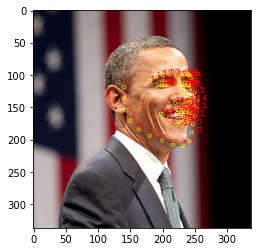

In [7]:
image_with_landmarks = cv2.cvtColor(image_with_landmarks , cv2.COLOR_BGR2RGB)

plt.imshow(image_with_landmarks)